In [1]:
import base64
import numpy as np
import pandas as pd
import os

# Plotly imports
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from PIL import Image
from nltk.stem import LancasterStemmer

# Other imports
from collections import Counter
import requests
import re
from nltk.corpus import stopwords
import string
import nltk
import imageio
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

from sklearn.feature_extraction import DictVectorizer

import requests
from PIL import Image
from io import BytesIO 

In [3]:
data = pd.read_csv('../dataset/NFA.train_pos.csv')
data

,Text,CleanTweet,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,The goal of Upcycle Green Technology #autorepa...,goal upcycle green technology help drive safel...,en,0.000,0.444,0.556,0.8750
1,ðµ Healthy environment for healthy skin ð...,healthy environment healthy skin meet rahel fo...,en,0.000,0.579,0.421,0.9022
2,Great to see the launch of this service! As we...,great see launch return use rail country begin...,en,0.000,0.532,0.468,0.9062
3,@sgtesco 1) I like $DOGE because it leaves les...,like leaves less ecological footprint also lik...,en,0.000,0.564,0.436,0.9077
4,"@wintonARK Yeah sure I get all that, so far it...",yeah sure get far looks like pos works great t...,en,0.000,0.575,0.425,0.8779
...,...,...,...,...,...,...,...
108,@Daniel_R_Ducote @ZephyrandC @cronintendo @Kyl...,u know paris agreement super vague states part...,en,0.049,0.455,0.497,0.9300
109,Look at these amazing Ecological Footprint Ple...,look amazing ecological footprint pledges crea...,en,0.000,0.421,0.579,0.8750
110,Sharing from the Genyk Corporate Facebook page...,sharing genyk corporate facebook commitment en...,en,0.000,0.495,0.505,0.8807
111,Positive ecological footprint project for the ...,positive ecological footprint project sustaina...,en,0.000,0.644,0.356,0.8591


In [5]:
data = data.drop(['Text', 'language'], axis =1)
data

,CleanTweet,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,goal upcycle green technology help drive safel...,0.000,0.444,0.556,0.8750
1,healthy environment healthy skin meet rahel fo...,0.000,0.579,0.421,0.9022
2,great see launch return use rail country begin...,0.000,0.532,0.468,0.9062
3,like leaves less ecological footprint also lik...,0.000,0.564,0.436,0.9077
4,yeah sure get far looks like pos works great t...,0.000,0.575,0.425,0.8779
...,...,...,...,...,...
108,u know paris agreement super vague states part...,0.049,0.455,0.497,0.9300
109,look amazing ecological footprint pledges crea...,0.000,0.421,0.579,0.8750
110,sharing genyk corporate facebook commitment en...,0.000,0.495,0.505,0.8807
111,positive ecological footprint project sustaina...,0.000,0.644,0.356,0.8591


In [6]:
data.shape

(113, 5)

In [7]:
data.columns

Index(['CleanTweet', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos',
       'sentiment_compound'],
      dtype='object')

In [8]:
vectorizer = CountVectorizer(max_features = 2500,max_df = 0.20)

In [9]:
tf = vectorizer.fit_transform(data['CleanTweet'])

In [10]:
tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
tf

<113x1009 sparse matrix of type '<class 'numpy.int64'>'
	with 1661 stored elements in Compressed Sparse Row format>

# NEGATIVE TWEETS

## Topic modelling: Latent Dirichlet Allocation

### Step 1. Instantiate the model

In [12]:
lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online', #mini-batch of training data to 
                                #update the ``components_``variable incrementally. 
                                learning_offset = 50.,#parameter that downweights early 
                                #iterations in online learning.
                                random_state = 42)

In [13]:
lda

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=42)

In [14]:
lda_model = lda.fit(tf)

### Step 2. Fit the model with the TF vectors calculated above 

In [15]:
lda_model.components_[0]

array([1.08875688, 0.76821053, 0.76137581, ..., 0.90142913, 0.87770986,
       0.78377345])

In [16]:
lda_model

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=42)

In [17]:
lda_model.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 5,
 'mean_change_tol': 0.001,
 'n_components': 5,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 42,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

### Step 3. Visualize and analyse the results 

In [18]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [19]:
n_top_words = 10
print("\nTopics in LDA model: ")
tf_feature_names = vectorizer.get_feature_names()

#tf_feature_names
print_top_words(lda_model, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:love use ways reducing grade much people new like environmental

Topic #1:like good way one friendly best using go natural join

Topic #2:energy sustainability personal saving proud hope autonomy associated small see

Topic #3:like earth help happy resources day best carbon love understand

Topic #4:help best health way green products improve good want would


In [20]:
first_topic = lda_model.components_[0]
second_topic = lda_model.components_[1]
third_topic = lda_model.components_[2]
fourth_topic = lda_model.components_[3]

In [21]:
tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
first_topic.shape

(1009,)

In [23]:
first_topic.argsort()

array([158, 911, 617, ..., 982, 960, 566], dtype=int64)

In [24]:
tf_feature_names

['able',
 'abolish',
 'abundant',
 'accelerate',
 'accept',
 'accepting',
 'access',
 'account',
 'accounting',
 'accurately',
 'act',
 'actions',
 'actively',
 'actually',
 'added',
 'address',
 'addressing',
 'adjustments',
 'admirable',
 'admittedly',
 'adopt',
 'advancement',
 'advantages',
 'afk',
 'agreement',
 'agriculture',
 'aka',
 'akin',
 'align',
 'allow',
 'allowing',
 'almost',
 'along',
 'already',
 'also',
 'alsoâ',
 'alternative',
 'although',
 'altogether',
 'always',
 'amazing',
 'among',
 'animals',
 'another',
 'anyone',
 'anyway',
 'app',
 'apparel',
 'applications',
 'appreciate',
 'appreciated',
 'approach',
 'april',
 'arable',
 'areas',
 'around',
 'art',
 'article',
 'asian',
 'asked',
 'asking',
 'associated',
 'astounding',
 'attract',
 'autonomy',
 'aviation',
 'award',
 'awarded',
 'aware',
 'awareness',
 'awesome',
 'ayoub',
 'baby',
 'bag',
 'bags',
 'based',
 'basic',
 'batteries',
 'beat',
 'beautiful',
 'becoming',
 'beef',
 'began',
 'begins',
 'bel

In [25]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
#argsort() sorts in descending way->x[startAt:endBefore:skip]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

In [26]:
first_topic_words

['love',
 'use',
 'ways',
 'reducing',
 'grade',
 'much',
 'people',
 'new',
 'like',
 'environmental',
 'smaller',
 'cleaner',
 'looking',
 'help',
 'save',
 'us',
 'helps',
 'friends',
 'pledge',
 'sharing',
 'see',
 'peacekeeping',
 'cape',
 'company',
 'would',
 'live',
 'plan',
 'easy',
 'know',
 'sure',
 'fewer',
 'please',
 'students',
 'make',
 'shout',
 'earth',
 'something',
 'interactive',
 'genyk',
 'taken',
 'favorite',
 'climate',
 'safety',
 'occupy',
 'stock',
 'bike',
 'minimize',
 'within',
 'paper',
 'prefers']

In [28]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

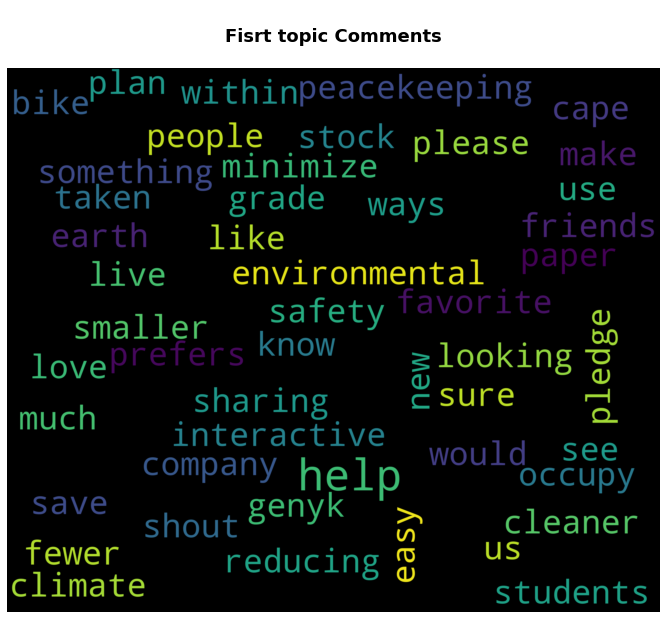

In [29]:
wordcloud = WordCloud(max_font_size=200, max_words=350, background_color="black",
                      width= 3000, height = 2500,
                      stopwords = stopwords.words('english')).generate(" ".join(first_topic_words))

plot_wordcloud(wordcloud, '\nFisrt topic')

In [35]:
first_ = np.array(Image.open(requests.get('https://cdn.pixabay.com/photo/2014/04/02/17/08/globe-308065_1280.png', stream=True).raw))
first_

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=uint8)

TypeError: Invalid shape (1263, 1280, 2) for image data

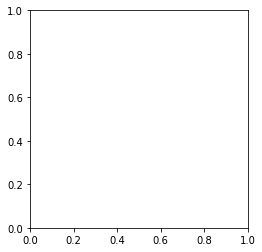

In [36]:
plt.imshow(first_)

(-0.5, 1279.5, 1262.5, -0.5)

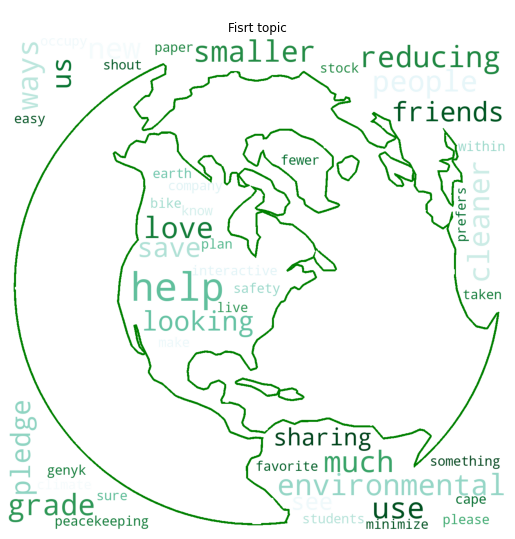

In [42]:
plt.figure(figsize=(20,20))
# The wordcloud of the raven for Edgar Allen Poe
plt.subplot(211)
wc = WordCloud(background_color="white", 
               mask=first_, 
               stopwords=STOPWORDS, collocations= False, 
               max_font_size= 100, contour_width=2, contour_color='green')

wc.generate(" ".join(first_topic_words))
plt.title(' \nFisrt topic')
plt.imshow(wc.recolor( colormap= 'BuGn' , random_state=17))
plt.axis('off')

(-0.5, 1279.5, 1262.5, -0.5)

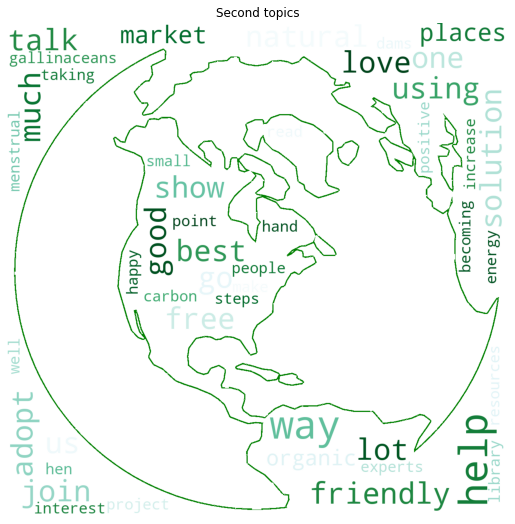

In [43]:
plt.figure(figsize=(20,20))
# The wordcloud of the raven for Edgar Allen Poe
plt.subplot(211)
wc = WordCloud(background_color="white", 
               max_words=300, 
               mask=first_, 
               stopwords=STOPWORDS, collocations= False, 
               max_font_size= 100, contour_width=1, contour_color='green')

wc.generate(" ".join(second_topic_words))
plt.title("Second topics")
plt.imshow(wc.recolor( colormap= 'BuGn' , random_state=17))
plt.axis('off')

(-0.5, 1279.5, 1262.5, -0.5)

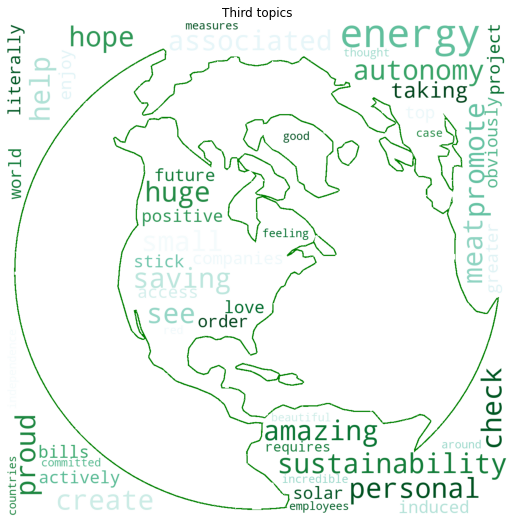

In [45]:
plt.figure(figsize=(20,20))
# The wordcloud of the raven for Edgar Allen Poe
plt.subplot(211)
wc = WordCloud(background_color="white", 
               max_words=300, 
               mask=first_, 
               stopwords=STOPWORDS, collocations= False, 
               max_font_size= 100, contour_width=1, contour_color='green')

wc.generate(" ".join(third_topic_words))
plt.title("Third topics")
plt.imshow(wc.recolor( colormap= 'BuGn' , random_state=17))
plt.axis('off')

# POSITIVE TWEETS 

In [342]:
data = pd.read_csv('../dataset/NFA.train_pos.csv')
data.head()

,Text,CleanTweet,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,The goal of Upcycle Green Technology #autorepa...,goal upcycle green technology help drive safel...,en,0.0,0.444,0.556,0.8750
1,ðµ Healthy environment for healthy skin ð...,healthy environment healthy skin meet rahel fo...,en,0.0,0.579,0.421,0.9022
2,Great to see the launch of this service! As we...,great see launch return use rail country begin...,en,0.0,0.532,0.468,0.9062
3,@sgtesco 1) I like $DOGE because it leaves les...,like leaves less ecological footprint also lik...,en,0.0,0.564,0.436,0.9077
4,"@wintonARK Yeah sure I get all that, so far it...",yeah sure get far looks like pos works great t...,en,0.0,0.575,0.425,0.8779


In [344]:
data = data.drop(['language', 'Text'], axis =1)
data

,CleanTweet,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,goal upcycle green technology help drive safel...,0.000,0.444,0.556,0.8750
1,healthy environment healthy skin meet rahel fo...,0.000,0.579,0.421,0.9022
2,great see launch return use rail country begin...,0.000,0.532,0.468,0.9062
3,like leaves less ecological footprint also lik...,0.000,0.564,0.436,0.9077
4,yeah sure get far looks like pos works great t...,0.000,0.575,0.425,0.8779
...,...,...,...,...,...
108,u know paris agreement super vague states part...,0.049,0.455,0.497,0.9300
109,look amazing ecological footprint pledges crea...,0.000,0.421,0.579,0.8750
110,sharing genyk corporate facebook commitment en...,0.000,0.495,0.505,0.8807
111,positive ecological footprint project sustaina...,0.000,0.644,0.356,0.8591


In [398]:
vectorizer2 = CountVectorizer(max_features = 2500,max_df = 0.20)

In [399]:
tf2 = vectorizer2.fit_transform(data['CleanTweet'])

In [400]:
tf2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [401]:
lda2 = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online', #mini-batch of training data to 
                                #update the ``components_``variable incrementally. 
                                learning_offset = 50.,#parameter that downweights early 
                                #iterations in online learning.
                                random_state = 42)

In [402]:
lda2

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=42)

In [403]:
lda_model2 = lda2.fit(tf2)

In [404]:
lda_model2.components_[0]

array([1.08875688, 0.76821053, 0.76137581, ..., 0.90142913, 0.87770986,
       0.78377345])

In [405]:
lda_model2

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=42)

In [406]:
first_topic2 = lda_model2.components_[0]
second_topic2 = lda_model2.components_[1]
third_topic2 = lda_model2.components_[2]
fourth_topic2 = lda_model2.components_[3]
fourth_topic2 = lda_model2.components_[4]

In [407]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [408]:
n_top_words = 10
print("\nTopics in LDA model: ")
tf_feature_names = vectorizer.get_feature_names()

#tf_feature_names
print_top_words(lda_model2, tf2_feature_names, n_top_words)


Topics in LDA model: 


NameError: name 'tf2_feature_names' is not defined

In [409]:
tf2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [410]:
first_topic2.shape

(1009,)

In [411]:
first_topic2.argsort()

array([158, 911, 617, ..., 982, 960, 566], dtype=int64)

In [412]:
tf2_feature_names

NameError: name 'tf2_feature_names' is not defined